In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

set_config(transform_output="pandas")
#load in data
sacramento = pd.read_csv("dataset/sacramento.csv")

In [2]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size= 0.75, random_state=42, shuffle= True)

In [3]:
# split training data into X and y
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [4]:
#extra after class : average weighted by distance
knn_regressor = KNeighborsRegressor(n_neighbors= 1, weights="distance")

param_grid = {
    "n_neighbors" : range(1,201,3)
}
#intialize our grid search
sacr_gridsearch = GridSearchCV(
   estimator = knn_regressor,
   param_grid= param_grid,
   cv = 5 ,
   scoring = "neg_root_mean_squared_error"
)
#fit our grid search
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=1, weights='distance'),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [5]:
results = pd.DataFrame(sacr_gridsearch.cv_results_).sort_values(
    by= "rank_test_score"
)
#only for neg rmspe
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.003061,0.000539,0.003401,0.000801,43,{'n_neighbors': 43},-85853.598623,-110668.743277,-99895.309656,-93103.598438,-94686.537418,96841.557483,8244.612284,1
13,0.003202,0.000402,0.004198,0.000402,40,{'n_neighbors': 40},-85835.506797,-110656.064233,-99813.031319,-93061.484355,-94896.159277,96852.449196,8232.573584,2
12,0.002600,0.000490,0.003401,0.000491,37,{'n_neighbors': 37},-85900.379579,-110516.373865,-99785.099857,-93010.973112,-95101.255697,96862.816422,8161.791298,3
16,0.002802,0.001170,0.004599,0.001357,49,{'n_neighbors': 49},-85709.419159,-110755.875911,-100266.264214,-93190.447460,-94583.994089,96901.200167,8338.714383,4
15,0.003000,0.000894,0.003600,0.000490,46,{'n_neighbors': 46},-85796.662334,-110717.658855,-100184.883684,-93179.625662,-94643.900677,96904.546243,8293.772729,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.003400,0.000801,0.006200,0.000749,199,{'n_neighbors': 199},-86897.174394,-113154.354590,-105213.902272,-96623.669269,-92538.421580,98885.504421,9303.441516,63
3,0.002800,0.000748,0.003201,0.000400,10,{'n_neighbors': 10},-89235.270298,-112241.782899,-99454.325760,-96323.660610,-98374.158214,99125.839556,7461.587832,64
2,0.003199,0.000979,0.003800,0.001599,7,{'n_neighbors': 7},-90749.115503,-112990.638311,-100103.708163,-98475.129695,-99423.276083,100348.373551,7160.968124,65
1,0.004400,0.001496,0.005400,0.001019,4,{'n_neighbors': 4},-93041.788088,-114717.927650,-101991.691533,-102193.019054,-102185.514173,102825.988100,6908.772736,66


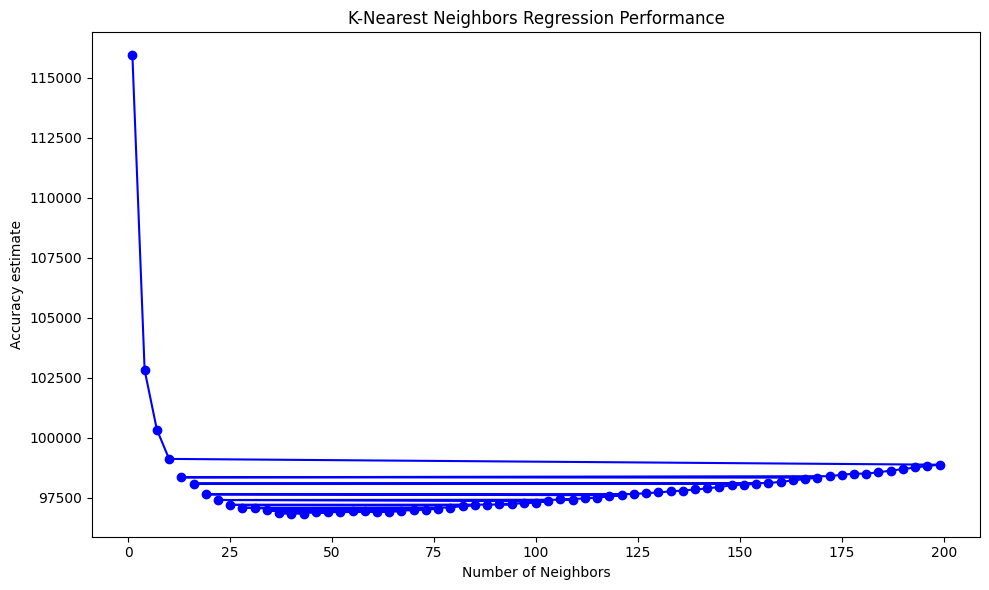

In [6]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [7]:
sacr_gridsearch.best_params_

{'n_neighbors': 43}

In [8]:
#make predictions on the test set
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**(1/2)
rmspe

85070.54635657773

In [9]:
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred= sacramento_test["predicted"]   
)
r2

0.33726360815465595

c:\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


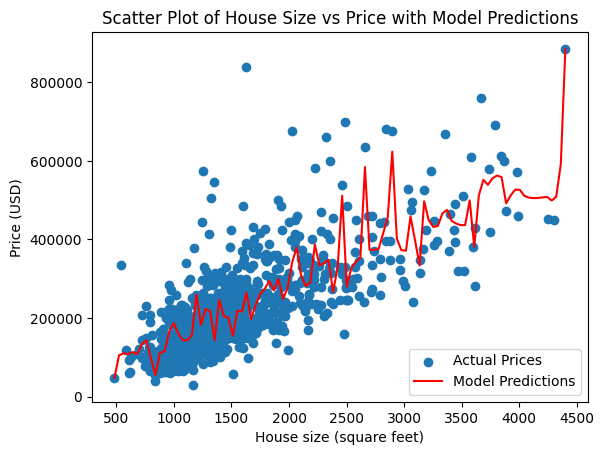

In [10]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();